In [1]:
# builtins
from glob import glob
import os

# third-party
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# project-specific
from src.calibrate import calibrate

Finding all calibration images...
Found 20 images. Sample input:


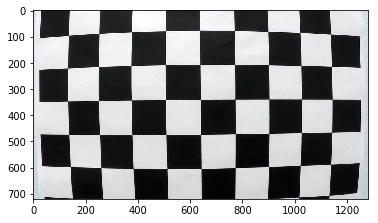

In [2]:
print("Finding all calibration images...")
calibration_image_paths = sorted(glob('./camera_cal/calibration*.jpg'), key=lambda p: (len(p), p))
calibration_images = list(map(cv2.imread, calibration_image_paths))
# for path, image in zip(calibration_image_paths, calibration_images):
#     print("{0} ({1[0]}w, {1[1]}h)".format(
#         os.path.basename(path),
#         image.shape
#     ))
print("Found {} images. Sample input:".format(len(calibration_images)))
plt.imshow(calibration_images[0])

In [3]:
print("Calibrating...")
used_calibration_images, object_points, all_corners, undistort = calibrate(
    calibration_images, 
    chessboard_dimensions=(9, 6), 
    to_grayscale_flag=cv2.COLOR_BGR2GRAY
)
print("Calibrated using {} chessboard images (was unable to use {} images).".format(
    len(used_calibration_images), len(calibration_images) - len(used_calibration_images)
))

Calibrating...
Calibrated using 17 chessboard images (was unable to use 3 images).


Writing to output_images/chessboards...
Written. Sample output with corners drawn:


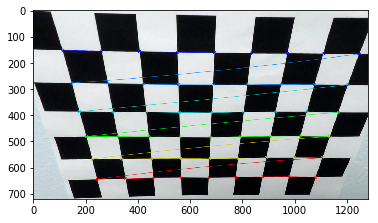

In [4]:
print("Writing to output_images/chessboards...")
for image, corners, i in zip(used_calibration_images, all_corners, range(len(used_calibration_images))):
    img = cv2.drawChessboardCorners(image, (9, 6), corners, True)
    cv2.imwrite("output_images/chessboards/{}.before.jpg".format(i), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    out = undistort(img)
    cv2.imwrite("output_images/chessboards/{}.after.jpg".format(i), cv2.cvtColor(out, cv2.COLOR_RGB2BGR))
    if i == 0:
        plt.imshow(out)
print("Written. Sample output with corners drawn:")